# Astrofizyka - praca domowa 1
### Dominik Stańczak

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
# from sympy.abc import *
import numpy as np
import sympy
sympy.init_printing()

In [2]:
N_gwiazd = 1e6

$$ f(M) = dN/dM = A_1 M^{-1.3} $$

od 0.08 do 0.5 mas słońca

$$ f(M) = dN/dM = A_2 M^{-2.2} $$

od 0.5 do 1 mas słońca

$$ f(M) = dN/dM = A_3 M^{-2.5} $$

od 1 do 150 mas słońca

Ile spodziewamy się gwiazd neutronowych (powstają z gwiazd o masie początkowej 8-20 mas słońca) i czarnych dziur (20 mas słońca)?

*przyjmuję masę Słońca równą 1.*

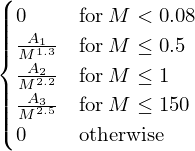

In [3]:
A1, A2, A3, M, U = sympy.symbols('A_1, A_2, A_3, M, U', positive=True)
f1 = A1 * M**-1.3
f2 = A2 * M**-2.2
f3 = A3 * M**-2.5

f = sympy.Piecewise((0, M < 0.08),
                    (f1, M <= 0.5),
                    (f2, M <= 1),
                    (f3, M <= 150),
                    (0, True))
f

In [4]:
ciągłość = [sympy.Eq(f1, f2).subs({M:0.5}),
            sympy.Eq(f2, f3).subs({M:1})
           ]
ciągłość

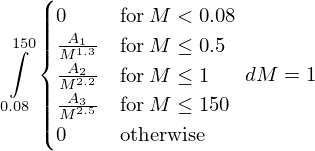

In [5]:
warunek_normalizacji = sympy.Eq(sympy.Integral(f, (M, 0.08, 150)), 1)
# normalizuję do 1, do prawdopodobienstw
warunek_normalizacji

In [6]:
wartości_stałych = sympy.solve(ciągłość + [warunek_normalizacji.doit()], (A1, A2, A3))
wartości_stałych

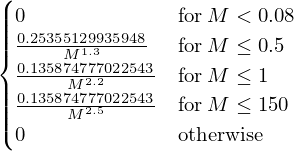

In [7]:
rozkład_prawdopodobieństwa = f.subs(wartości_stałych)
rozkład_prawdopodobieństwa

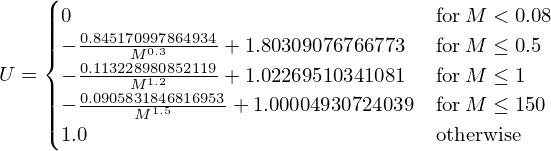

In [8]:
dystrybuanta = rozkład_prawdopodobieństwa.integrate()
równanie = sympy.Eq(U, dystrybuanta) # U ma rozkład jednorodny z zakresu (0, 1)
równanie

In [9]:
rozwiązanie = sympy.solve(równanie, M, rational=False)
# rozwiązanie ma dość paskudną formę przez trzy niezerowe przypadki

def squash_solution(solved_eq, x):
    solutions = [sympy.lambdify(U, out, "numpy")(x) for out in solved_eq]
    y = np.zeros_like(x)
    for sol in solutions:
        indices = ~np.isnan(sol)
        y[indices] = sol[indices]
    return y

masy = squash_solution(rozwiązanie, np.random.random(int(N_gwiazd)))
masy

array([1.42039344, 0.22285203, 1.7941953 , ..., 0.36699205, 1.04696562,
       0.31514545])

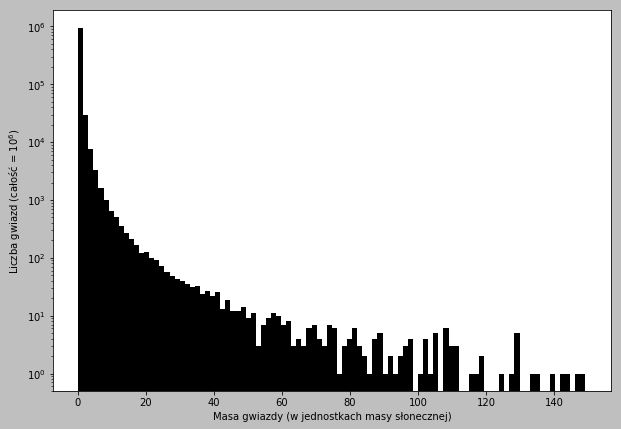

In [10]:
plt.style.use('grayscale')
plt.figure(figsize=(10,7))
plt.hist(masy, bins=100, log=True);
plt.ylabel("Liczba gwiazd (całość = $10^6$)");
plt.xlabel("Masa gwiazdy (w jednostkach masy słonecznej)");

In [11]:
print(f"Średnia masa wylosowanej planety to {np.mean(masy):.3f} ± {np.std(masy):.3f} mas Słońca.")
print(f"{np.sum(masy > 8)} planet ma masę powyżej 8 mas Słońca, a powyżej 20 - {np.sum(masy > 20)}.")

Średnia masa wylosowanej planety to 0.510 ± 1.690 mas Słońca.
3940 planet ma masę powyżej 8 mas Słońca, a powyżej 20 - 995.


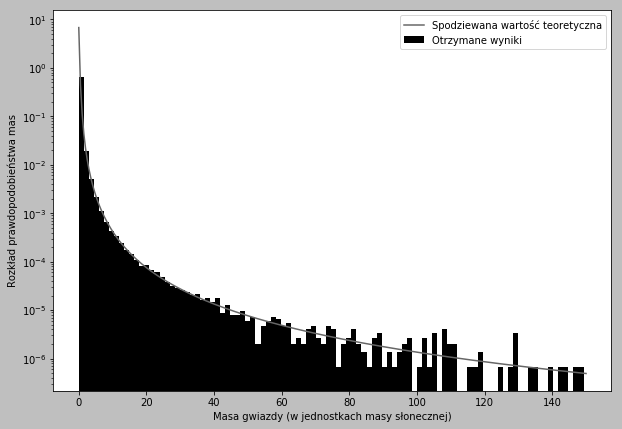

In [12]:
plt.figure(figsize=(10,7))
plt.hist(masy, bins=100, density=True, label="Otrzymane wyniki");
plt.yscale('log')
plt.xlabel("Masa gwiazdy (w jednostkach masy słonecznej)");
plt.ylabel("Rozkład prawdopodobieństwa mas")
x = np.linspace(0.08, 150, 300)
y = sympy.lambdify(M, rozkład_prawdopodobieństwa, 'numpy')(x)
plt.plot(x, y, label="Spodziewana wartość teoretyczna")
plt.legend(loc="upper right")